In [276]:
# Configure desired module
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import yfinance as yf

import datetime
from datetime import datetime, date

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_palette("pastel")  # Change "pastel" to any other available palette

# Adjust format table
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 7)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 60)

In [277]:
# Acquire and organize stocks data from Yahoo Finance
def get_stock_data(ticker, start, end):
    data = yf.download(ticker, start=start, end=end)
    data.insert(0, "Ticker", ticker)
    return data

start = datetime(2020, 1, 1)
end = datetime(2023, 7, 31)
get_stock_data("AAPL", start, end)[:10]

[*********************100%***********************]  1 of 1 completed


           Ticker       Open       High        Low   
Date                                                 
2020-01-02   AAPL  74.059998  75.150002  73.797501  \
2020-01-03   AAPL  74.287498  75.144997  74.125000   
2020-01-06   AAPL  73.447502  74.989998  73.187500   
2020-01-07   AAPL  74.959999  75.224998  74.370003   
2020-01-08   AAPL  74.290001  76.110001  74.290001   
2020-01-09   AAPL  76.809998  77.607498  76.550003   
2020-01-10   AAPL  77.650002  78.167503  77.062500   
2020-01-13   AAPL  77.910004  79.267502  77.787498   
2020-01-14   AAPL  79.175003  79.392502  78.042503   
2020-01-15   AAPL  77.962502  78.875000  77.387497   

                Close  Adj Close     Volume  
Date                                         
2020-01-02  75.087502  73.347931  135480400  
2020-01-03  74.357498  72.634842  146322800  
2020-01-06  74.949997  73.213615  118387200  
2020-01-07  74.597504  72.869293  108872000  
2020-01-08  75.797501  74.041481  132079200  
2020-01-09  77.407501  75.614

In [278]:
# gets data for multiple stocks
def get_data_for_multiple_stocks(tickers, start, end):
    stocks = dict()
    for ticker in tickers: # tickers: a list of stock symbols to fetch
        s = get_stock_data(ticker, start, end) # start and end are the start end dates
        stocks[ticker] = s
    return stocks

# get the data for all the stocks that we want
raw = get_data_for_multiple_stocks(
    ["AAPL", "AMZN", "GOOG", "META", "MSFT", "NVDA", "TSLA"],
    start, end)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [279]:
# take a peek at the data for AAPL
raw['AAPL'][:5]

           Ticker       Open       High        Low   
Date                                                 
2020-01-02   AAPL  74.059998  75.150002  73.797501  \
2020-01-03   AAPL  74.287498  75.144997  74.125000   
2020-01-06   AAPL  73.447502  74.989998  73.187500   
2020-01-07   AAPL  74.959999  75.224998  74.370003   
2020-01-08   AAPL  74.290001  76.110001  74.290001   

                Close  Adj Close     Volume  
Date                                         
2020-01-02  75.087502  73.347939  135480400  
2020-01-03  74.357498  72.634850  146322800  
2020-01-06  74.949997  73.213623  118387200  
2020-01-07  74.597504  72.869278  108872000  
2020-01-08  75.797501  74.041496  132079200  

In [280]:
def pivot_tickers_to_columns(raw, column):
    items = []
    has_date_column = False

    # Check if the "Date" column is present in any of the dataframes
    for key in raw:
        data = raw[key]
        if "Date" in data.columns:
            has_date_column = True
            break

    # If "Date" column is present, use it for merging, otherwise, directly pivot
    if has_date_column:
        for key in raw:
            data = raw[key]
            subset = data[["Ticker", "Date", column]]  # Ensure "Ticker" and "Date" columns are included
            items.append(subset)
        
        combined = pd.concat(items)
        
        # Convert the "Date" column to a pandas datetime type if it's not already
        combined["Date"] = pd.to_datetime(combined["Date"])
        
        # Pivot the DataFrame using pivot_table()
        pivot_result = combined.pivot_table(index="Date", columns="Ticker", values=column)
    else:
        # Directly pivot the DataFrame without merging
        combined = pd.concat(raw)
        pivot_result = combined.pivot_table(index="Date", columns="Ticker", values=column)
        
    return pivot_result

close_px = pivot_tickers_to_columns(raw, "Close")
close_px[:10]


Ticker           AAPL       AMZN       GOOG        META   
Date                                                      
2020-01-02  75.087502  94.900497  68.368500  209.779999  \
2020-01-03  74.357498  93.748497  68.032997  208.669998   
2020-01-06  74.949997  95.143997  69.710503  212.600006   
2020-01-07  74.597504  95.343002  69.667000  213.059998   
2020-01-08  75.797501  94.598503  70.216003  215.220001   
2020-01-09  77.407501  95.052498  70.991501  218.300003   
2020-01-10  77.582497  94.157997  71.486504  218.059998   
2020-01-13  79.239998  94.565002  71.961502  221.910004   
2020-01-14  78.169998  93.472000  71.543999  219.059998   
2020-01-15  77.834999  93.100998  71.959999  221.149994   

Ticker            MSFT       NVDA       TSLA  
Date                                          
2020-01-02  160.619995  59.977501  28.684000  
2020-01-03  158.619995  59.017502  29.534000  
2020-01-06  159.029999  59.264999  30.102667  
2020-01-07  157.580002  59.982498  31.270666  
2020-01-0

Plotting time-series prices

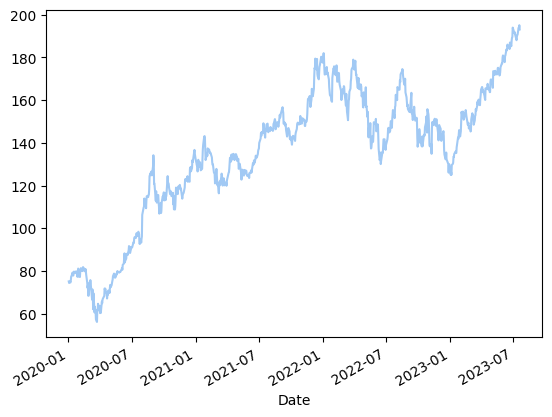

In [281]:
# plot the closing prices of AAPL
close_px['AAPL'].plot();

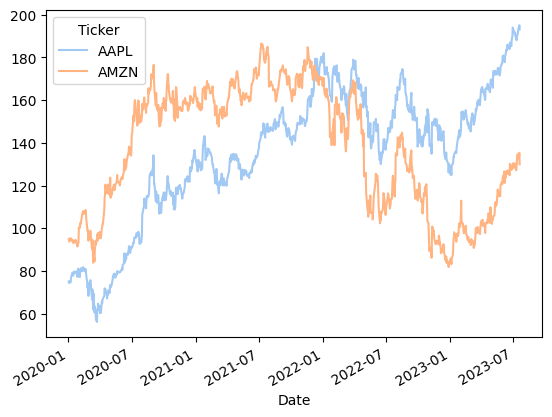

In [282]:
# plot AAPL vs AMZN on the same chart
close_px[['AAPL', 'AMZN']].plot();

In [283]:
# pivot the volume data into columns
volumes = pivot_tickers_to_columns(raw, "Volume")
volumes.tail()

Ticker          AAPL      AMZN      GOOG      META   
Date                                                 
2023-07-14  41573900  54388100  20482800  22576000  \
2023-07-17  50520200  48450200  20675300  25323100   
2023-07-18  48353800  54969100  21071200  20764600   
2023-07-19  80507300  54531000  22313800  21763700   
2023-07-20  59415700  59601200  27451800  23691600   

Ticker          MSFT      NVDA       TSLA  
Date                                       
2023-07-14  28302200  77066400  119771100  
2023-07-17  20363900  51048800  131569600  
2023-07-18  64872700  57019000  112434700  
2023-07-19  39732900  42750200  142355400  
2023-07-20  33678000  53399300  174165400  

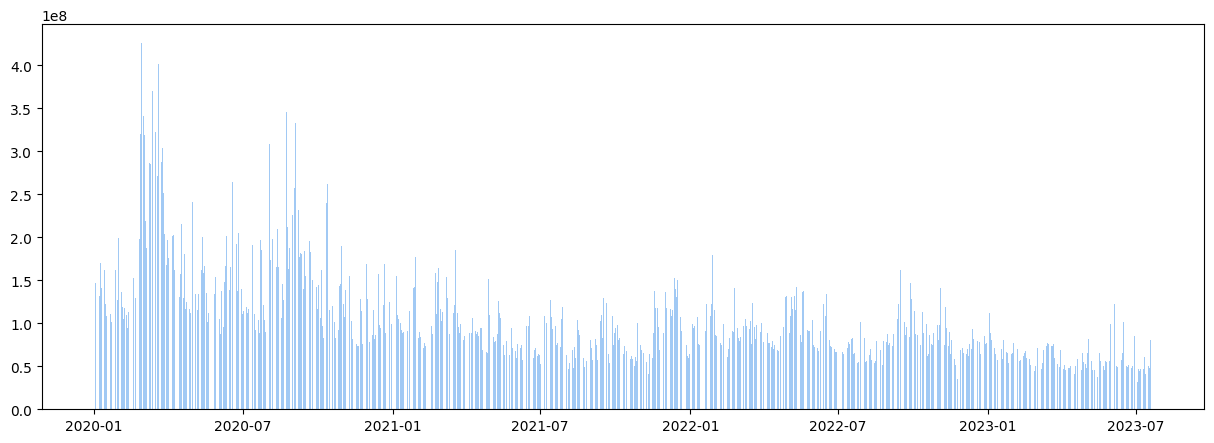

In [284]:
# plot the volume for AAPL
aapl_volume = volumes[["AAPL"]]
plt.bar(aapl_volume.index, aapl_volume["AAPL"])
plt.gcf().set_size_inches(15,5)

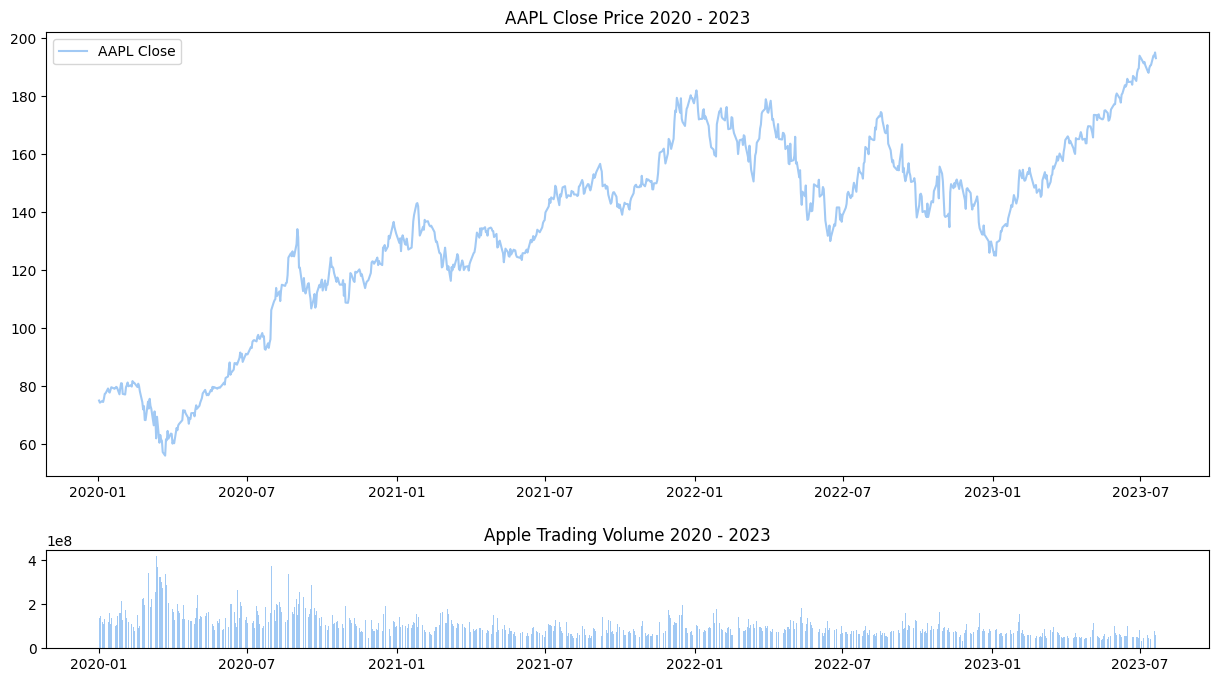

In [285]:
# draw the price history on the top
top = plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4)
top.plot(close_px['AAPL'].index, close_px['AAPL'], label='AAPL Close')
plt.title('AAPL Close Price 2020 - 2023')
plt.legend(loc=2)

# and the volume along the bottom
bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
bottom.bar(aapl_volume.index, aapl_volume['AAPL'])
plt.title('Apple Trading Volume 2020 - 2023')
plt.subplots_adjust(hspace=0.75)
plt.gcf().set_size_inches(15,8)


Computing basic daily percentage variation

In [286]:
daily_pc = close_px / close_px.shift(1) - 1
daily_pc[:10]

Ticker          AAPL      AMZN      GOOG      META   
Date                                                 
2020-01-02       NaN       NaN       NaN       NaN  \
2020-01-03 -0.009722 -0.012139 -0.004907 -0.005291   
2020-01-06  0.007968  0.014886  0.024657  0.018834   
2020-01-07 -0.004703  0.002092 -0.000624  0.002164   
2020-01-08  0.016086 -0.007809  0.007880  0.010138   
2020-01-09  0.021241  0.004799  0.011044  0.014311   
2020-01-10  0.002261 -0.009411  0.006973 -0.001099   
2020-01-13  0.021364  0.004323  0.006645  0.017656   
2020-01-14 -0.013503 -0.011558 -0.005802 -0.012843   
2020-01-15 -0.004286 -0.003969  0.005815  0.009541   

Ticker          MSFT      NVDA      TSLA  
Date                                      
2020-01-02       NaN       NaN       NaN  
2020-01-03 -0.012452 -0.016006  0.029633  
2020-01-06  0.002585  0.004194  0.019255  
2020-01-07 -0.009118  0.012107  0.038801  
2020-01-08  0.015928  0.001876  0.049205  
2020-01-09  0.012493  0.010983 -0.021945  
2020-01

In [287]:
# check the percentage on 2012-01-05
close_px.loc['2023-07-20']['AAPL'] / \
    close_px.loc['2023-07-19']['AAPL'] -1

-0.010097391896840224

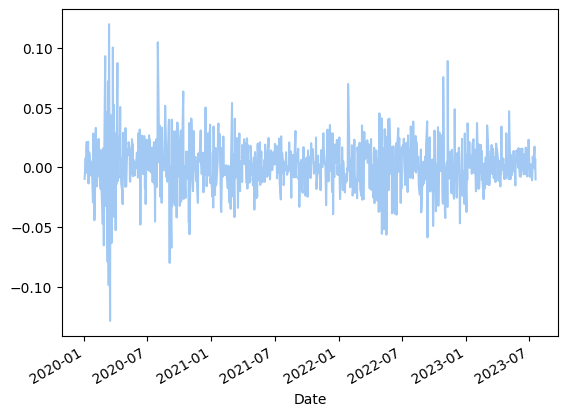

In [288]:
# plot daily percentage variation for AAPL
daily_pc["AAPL"].plot();

Computing simple daily cumulative returns

In [289]:
# computing daily cumulative return
daily_cr = (1 + daily_pc).cumprod()
daily_cr[:10]

Ticker          AAPL      AMZN      GOOG      META   
Date                                                 
2020-01-02       NaN       NaN       NaN       NaN  \
2020-01-03  0.990278  0.987861  0.995093  0.994709   
2020-01-06  0.998169  1.002566  1.019629  1.013443   
2020-01-07  0.993474  1.004663  1.018993  1.015635   
2020-01-08  1.009456  0.996818  1.027023  1.025932   
2020-01-09  1.030897  1.001602  1.038366  1.040614   
2020-01-10  1.033228  0.992176  1.045606  1.039470   
2020-01-13  1.055302  0.996465  1.052553  1.057823   
2020-01-14  1.041052  0.984947  1.046447  1.044237   
2020-01-15  1.036591  0.981038  1.052531  1.054200   

Ticker          MSFT      NVDA      TSLA  
Date                                      
2020-01-02       NaN       NaN       NaN  
2020-01-03  0.987548  0.983994  1.029633  
2020-01-06  0.990101  0.988121  1.049458  
2020-01-07  0.981073  1.000083  1.090178  
2020-01-08  0.996700  1.001959  1.143820  
2020-01-09  1.009152  1.012963  1.118719  
2020-01

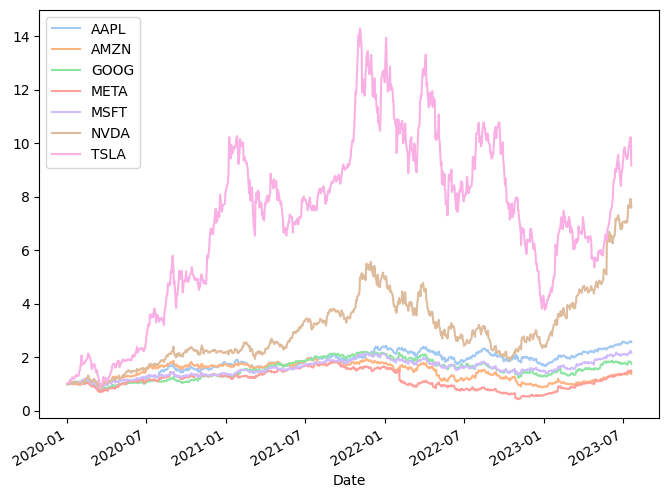

In [290]:
# plot the monthly cumulative returns
daily_cr.plot(figsize=(8,6))
plt.legend(loc=2)

Resampling data from daily to monthly returns

In [291]:
# resample to end of month and forward fill values
monthly = close_px.asfreq('M').ffill()
monthly[:10]

Ticker            AAPL        AMZN       GOOG        META   
Date                                                        
2020-01-31   77.377502  100.435997  71.711502  201.910004  \
2020-02-29   77.377502  100.435997  71.711502  201.910004   
2020-03-31   63.572498   97.486000  58.140499  166.800003   
2020-04-30   73.449997  123.699997  67.432999  204.710007   
2020-05-31   73.449997  123.699997  67.432999  204.710007   
2020-06-30   91.199997  137.940994  70.680496  227.070007   
2020-07-31  106.260002  158.233994  74.148003  253.669998   
2020-08-31  129.039993  172.548004  81.709000  293.200012   
2020-09-30  115.809998  157.436493  73.480003  261.899994   
2020-10-31  115.809998  157.436493  73.480003  261.899994   

Ticker            MSFT        NVDA        TSLA  
Date                                            
2020-01-31  170.229996   59.107498   43.371334  
2020-02-29  170.229996   59.107498   43.371334  
2020-03-31  157.710007   65.900002   34.933334  
2020-04-30  179.210007

In [292]:
# computing the monthly percentage variation
monthly_pc = monthly / monthly.shift(1) - 1
monthly_pc[:10]

Ticker          AAPL      AMZN      GOOG      META   
Date                                                 
2020-01-31       NaN       NaN       NaN       NaN  \
2020-02-29  0.000000  0.000000  0.000000  0.000000   
2020-03-31 -0.178411 -0.029372 -0.189244 -0.173889   
2020-04-30  0.155374  0.268900  0.159828  0.227278   
2020-05-31  0.000000  0.000000  0.000000  0.000000   
2020-06-30  0.241661  0.115125  0.048159  0.109228   
2020-07-31  0.165132  0.147114  0.049059  0.117144   
2020-08-31  0.214380  0.090461  0.101972  0.155832   
2020-09-30 -0.102526 -0.087579 -0.100711 -0.106753   
2020-10-31  0.000000  0.000000  0.000000  0.000000   

Ticker          MSFT      NVDA      TSLA  
Date                                      
2020-01-31       NaN       NaN       NaN  
2020-02-29  0.000000  0.000000  0.000000  
2020-03-31 -0.073547  0.114918 -0.194552  
2020-04-30  0.136326  0.108801  0.492137  
2020-05-31  0.000000  0.000000  0.000000  
2020-06-30  0.135595  0.299815  0.381043  
2020-07

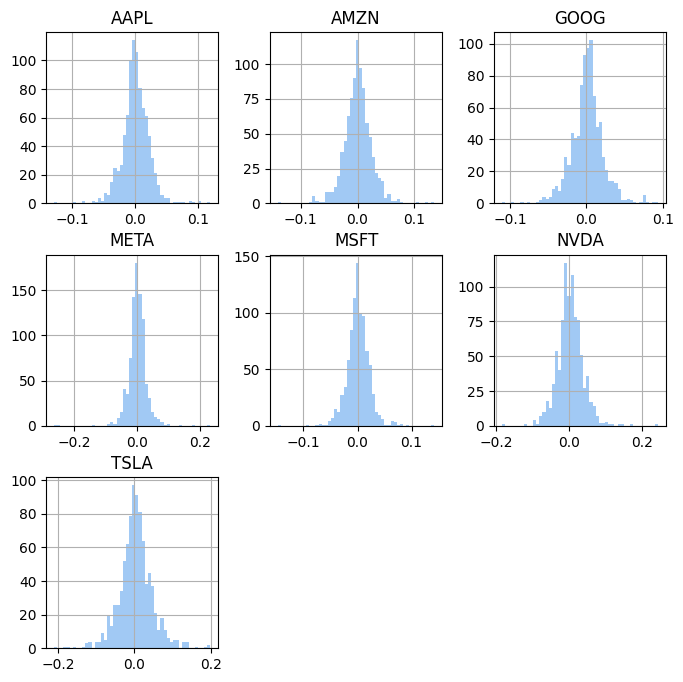

In [293]:
# matrix of all stocks daily % variation histograms
daily_pc.hist(bins=50, figsize=(8,8));

Performing moving average computing

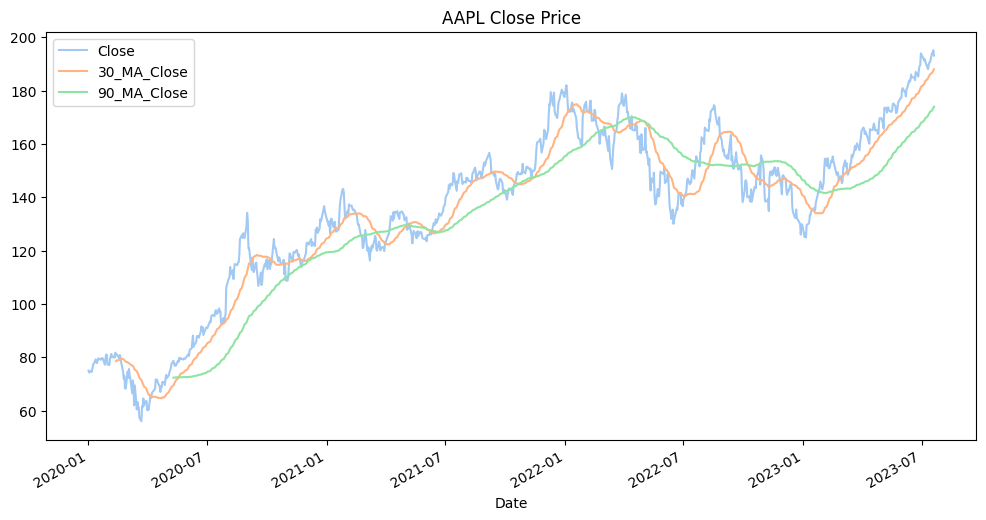

In [294]:
# extract just AAPL close
aapl_close = close_px[['AAPL']]['AAPL']

# computing the 30 and 90 day rolling means
ma_30 = aapl_close.rolling(window=30).mean()
ma_90 = aapl_close.rolling(window=90).mean()

# compose into a DataFrame that can be plotted
result = pd.DataFrame({'Close': aapl_close, 
                       '30_MA_Close': ma_30,
                       '90_MA_Close': ma_90})

# plot all the series against each other
result.plot(title="AAPL Close Price")
plt.gcf().set_size_inches(12,6)

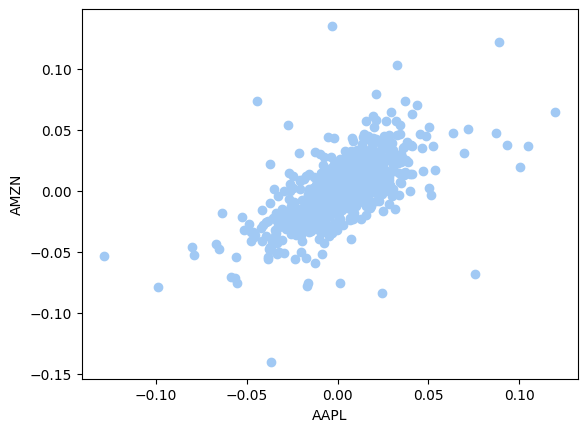

In [295]:
# plot the daily percentage change of AAPL vs AMZN
plt.scatter(daily_pc['AAPL'], daily_pc['AMZN'])
plt.xlabel('AAPL')
plt.ylabel('AMZN');

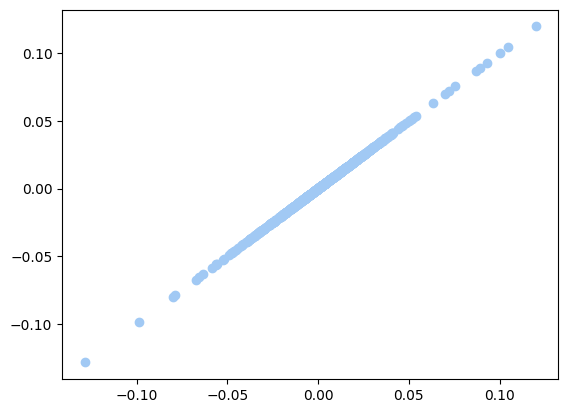

In [296]:
# demonstrate perfect correlation
plt.scatter(daily_pc['AAPL'], daily_pc['AAPL']);

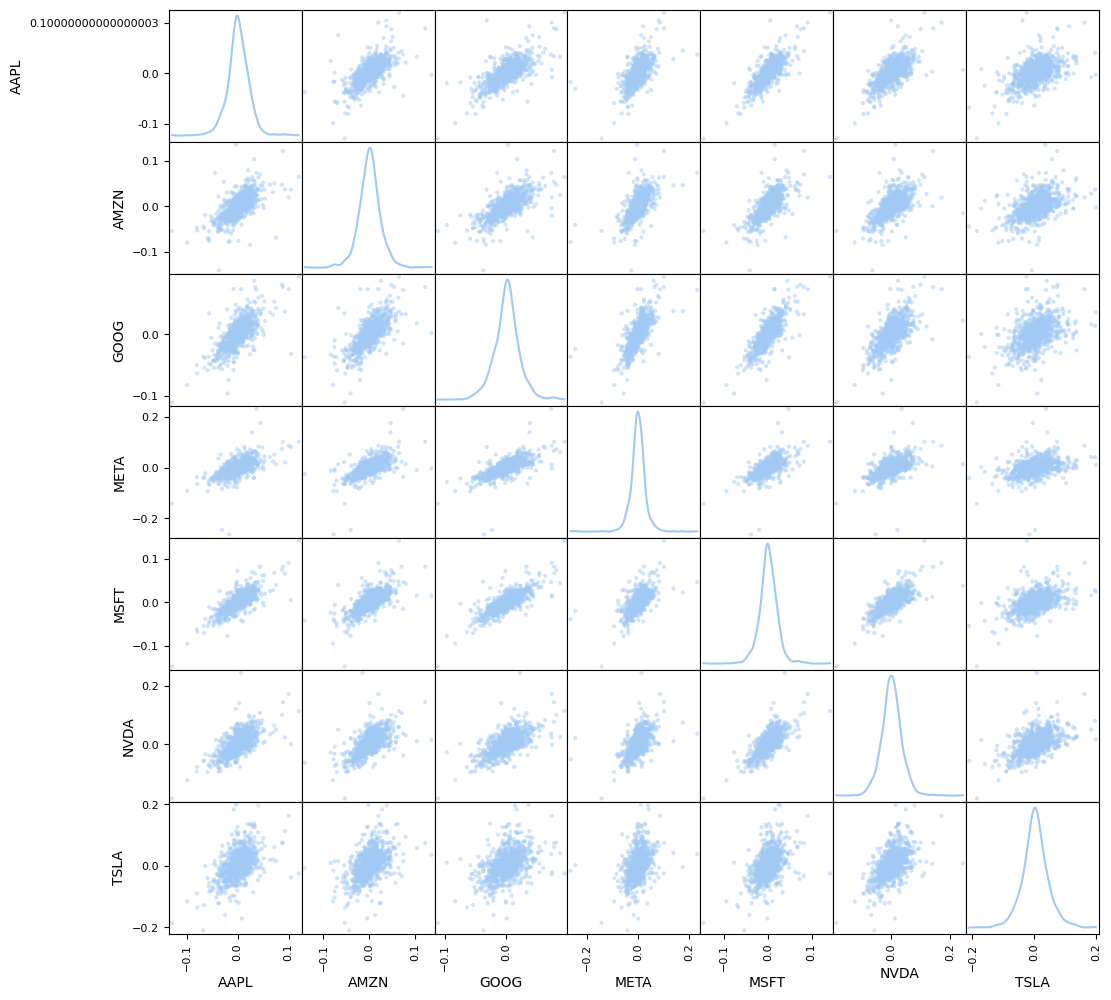

In [313]:
# plot the scatter of daily price changed for ALL stocks
from pandas.plotting import scatter_matrix
scatter_matrix(daily_pc, diagonal='kde', figsize=(12,12));

In [314]:
# calculate the correlation between all the stocks relative
# to daily percentage change
corrs = daily_pc.corr()
corrs

Ticker      AAPL      AMZN      GOOG      META      MSFT   
Ticker                                                     
AAPL    1.000000  0.645297  0.704273  0.611984  0.788176  \
AMZN    0.645297  1.000000  0.678800  0.615310  0.692234   
GOOG    0.704273  0.678800  1.000000  0.689074  0.798953   
META    0.611984  0.615310  0.689074  1.000000  0.631088   
MSFT    0.788176  0.692234  0.798953  0.631088  1.000000   
NVDA    0.677229  0.614796  0.656589  0.562444  0.735179   
TSLA    0.516904  0.463862  0.436324  0.363001  0.478712   

Ticker      NVDA      TSLA  
Ticker                      
AAPL    0.677229  0.516904  
AMZN    0.614796  0.463862  
GOOG    0.656589  0.436324  
META    0.562444  0.363001  
MSFT    0.735179  0.478712  
NVDA    1.000000  0.530729  
TSLA    0.530729  1.000000  

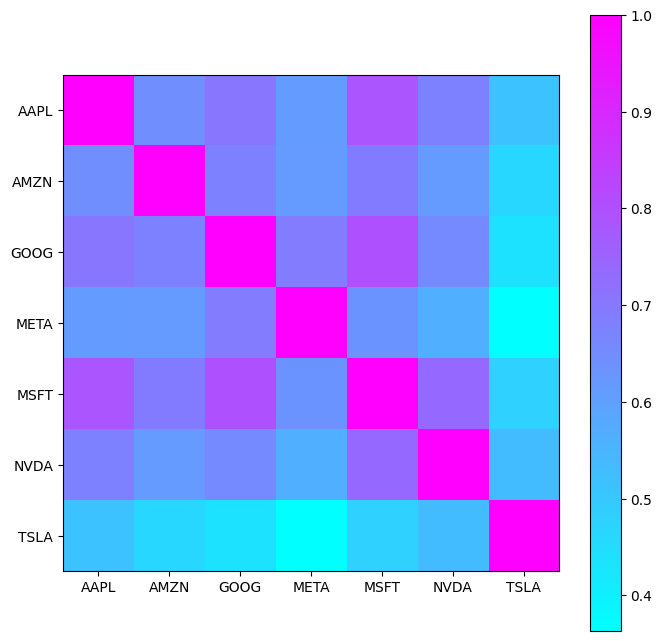

In [325]:
# plot a heatmap of the correlations
plt.imshow(corrs, cmap='cool', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corrs)), corrs.columns)
plt.yticks(range(len(corrs)), corrs.columns)
plt.gcf().set_size_inches(8,8)

Volatility

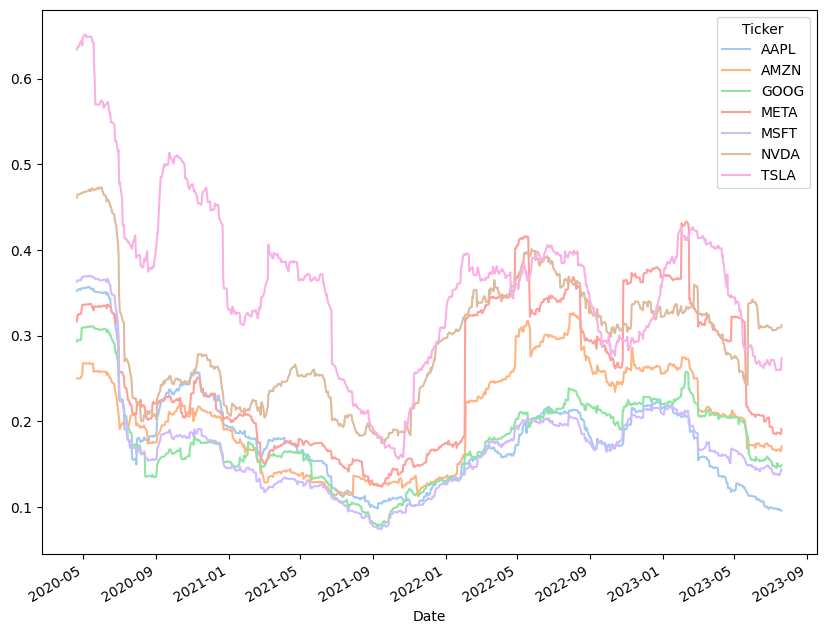

In [326]:
# 75 period minimum
min_periods = 75
# calculate the volatility
vol = daily_pc.rolling(window=min_periods).std() * \
        np.sqrt(min_periods)
# plot it
vol.plot(figsize=(10, 8));

Determining risk relative to expected returns

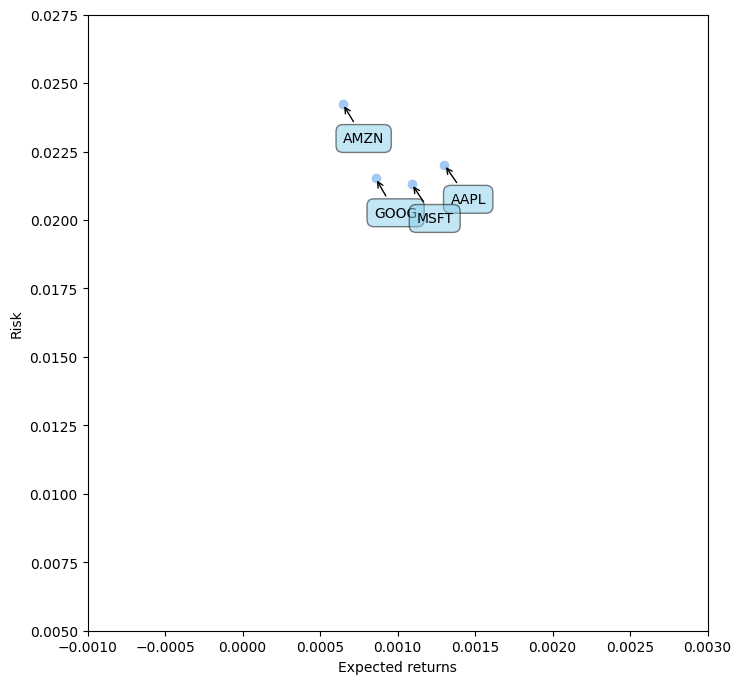

In [327]:
# generate a scatter of the mean vs std of daily % change
plt.scatter(daily_pc.mean(), daily_pc.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# this adds fancy labels to each dot, with an arrow too
for label, x, y in zip(daily_pc.columns, 
                       daily_pc.mean(), 
                       daily_pc.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (30, -30),
        textcoords = 'offset points', ha = 'right', 
        va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', 
                    fc = 'skyblue', 
                    alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', 
                          connectionstyle = 'arc3,rad=0'))

# set ranges and scales for good presentation
plt.xlim(-0.001, 0.003)
plt.ylim(0.005, 0.0275)

# set size
plt.gcf().set_size_inches(8,8)